# **Final project : Support Vector Machine**
## **student 1: Hồ Thế Phúc - 21127670**
## **student 2: Hoàng Nhật Quang - 21127543**

## **Import libraries**
Dưới đây là những thư viện cần thiết cho dự án.

In [20]:
import os
import gzip
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## **Load Data**

Lấy data tại đây: https://github.com/zalandoresearch/fashion-mnist 

In [21]:
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Đường dẫn đến các file dữ liệu gzip
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

## **Giảm kích thức mẫu dữ liệu bằng PCA**

PCA là viết tắt của "Principal Component Analysis," là một phương pháp thống kê được sử dụng trong lĩnh vực phân tích dữ liệu và giảm chiều dữ liệu. Mục tiêu chính của PCA là tìm ra các thành phần chính (principal components) của dữ liệu sao cho chúng giữ lại nhiều thông tin nhất và đồng thời là độc lập tuyến tính với nhau.

Quá trình PCA bắt đầu bằng việc tính ma trận hiệp phương sai (covariance matrix) của dữ liệu, sau đó tìm ra các vectơ riêng và giá trị riêng của ma trận này. Các vectơ riêng này tương ứng với các hướng trong không gian dữ liệu mà sự biến đổi là lớn nhất, còn giá trị riêng liên quan đến lượng biến đổi theo hướng đó.

Các thành phần chính được xếp theo thứ tự giảm dần của giá trị riêng, và ta có thể giữ lại một số lượng thành phần chính quan trọng nhất để giảm chiều dữ liệu mà vẫn giữ được lượng thông tin đáng kể. Điều này giúp giảm số chiều của dữ liệu, giảm độ phức tạp và nâng cao hiệu suất tính toán.

PCA thường được sử dụng trong các lĩnh vực như nhận dạng khuôn mẫu, nhận dạng khuôn mặt, xử lý ảnh, và nhiều ứng dụng khác trong phân tích dữ liệu đa chiều.

Để làm được điều này trong project này, thư viện **Sklearn** đã được sử dụng và class **PCA** được tạo sẵn.

### **Giảm xuống còn 5 features**

Original Training Data Shape: (60000, 784)
Reduced Training Data Shape: (60000, 5)


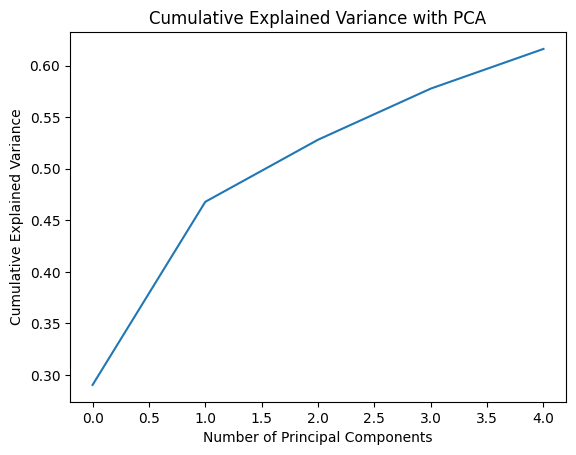

In [22]:
n_components = 5  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca_5 = pca.fit_transform(X_train)

# Transform the test data
X_test_pca_5 = pca.transform(X_test)

# Print or use the reduced feature vectors as needed
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape:", X_train_pca_5.shape)

# Optionally, you can visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance with PCA')
plt.show()

### **Giảm xuống còn 50 features**

Original Training Data Shape: (60000, 784)
Reduced Training Data Shape: (60000, 50)


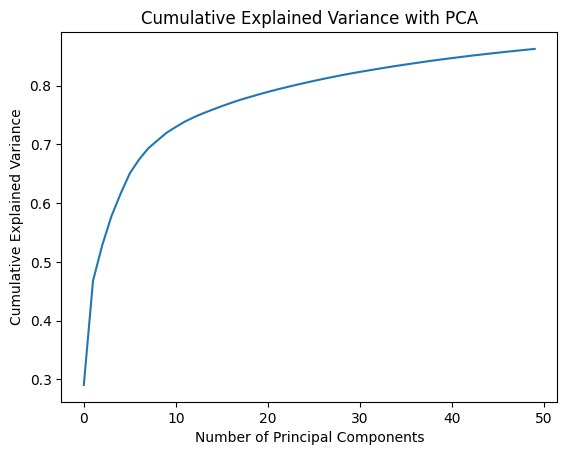

In [23]:
n_components = 50  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca_50 = pca.fit_transform(X_train)

# Transform the test data
X_test_pca_50 = pca.transform(X_test)

# Print or use the reduced feature vectors as needed
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape:", X_train_pca_50.shape)

# Optionally, you can visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance with PCA')
plt.show()

### **Giảm Xuống còn 100 feauture**

Original Training Data Shape: (60000, 784)
Reduced Training Data Shape: (60000, 100)


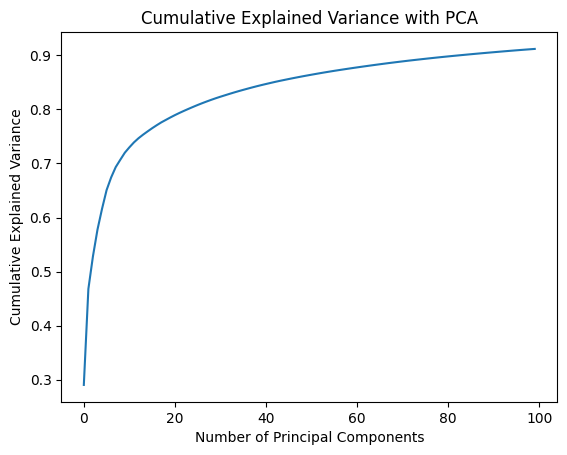

In [24]:
n_components = 100  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca_100 = pca.fit_transform(X_train)

# Transform the test data
X_test_pca_100 = pca.transform(X_test)

# Print or use the reduced feature vectors as needed
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape:", X_train_pca_100.shape)

# Optionally, you can visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance with PCA')
plt.show()

## **Trích suất đặc trưng**

Sử dụng mật độ điểm ảnh và tính đối xứng.

### **5 thuộc tính**

In [25]:
intensity = X_train_pca_5.sum(axis=1) / X_train_pca_5.shape[1]
X_flip = np.flipud(X_train_pca_5)
symmetry= np.mean((X_train_pca_5-X_flip),axis=1)

intensity_np = intensity
symmetry_np = symmetry
# Horizontally stack intensity and symmetry to create X_new
X_new_train_5 = np.hstack((X_train_pca_5,intensity_np.reshape(-1, 1), symmetry_np.reshape(-1, 1)))



intensity_test = X_test_pca_5.sum(axis=1) / X_test_pca_5.shape[1]
X_flip_test = np.flipud(X_test_pca_5)
symmetry_test= np.mean((X_test_pca_5-X_flip_test),axis=1)

intensity_np_test = intensity_test
symmetry_np_test = symmetry_test
# Horizontally stack intensity and symmetry to create X_new
X_new_test_5 = np.hstack((X_test_pca_5,intensity_np_test.reshape(-1, 1), symmetry_np_test.reshape(-1, 1)))

scaler = StandardScaler()
X_train_5 = scaler.fit_transform(X_new_train_5)
X_test_5 = scaler.transform(X_new_test_5)
X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(X_train_5, y_train, test_size=0.2, random_state=42)

print("Train: ",X_train_5.shape)
print("Validation",X_val_5.shape)

Train:  (48000, 7)
Validation (12000, 7)


### **50 thuộc tính**

In [26]:
intensity = X_train_pca_50.sum(axis=1) / X_train_pca_50.shape[1]
X_flip = np.flipud(X_train_pca_50)
symmetry= np.mean((X_train_pca_50-X_flip),axis=1)

intensity_np = intensity
symmetry_np = symmetry
# Horizontally stack intensity and symmetry to create X_new
X_new_train_50 = np.hstack((X_train_pca_50,intensity_np.reshape(-1, 1), symmetry_np.reshape(-1, 1)))



intensity_test = X_test_pca_50.sum(axis=1) / X_test_pca_50.shape[1]
X_flip_test = np.flipud(X_test_pca_50)
symmetry_test= np.mean((X_test_pca_50-X_flip_test),axis=1)

intensity_np_test = intensity_test
symmetry_np_test = symmetry_test
# Horizontally stack intensity and symmetry to create X_new
X_new_test_50 = np.hstack((X_test_pca_50,intensity_np_test.reshape(-1, 1), symmetry_np_test.reshape(-1, 1)))

scaler = StandardScaler()
X_train_50 = scaler.fit_transform(X_new_train_50)
X_test_50 = scaler.transform(X_new_test_50)
X_train_50, X_val_50, y_train_50, y_val_50 = train_test_split(X_train_50, y_train, test_size=0.2, random_state=42)

print("Train: ",X_train_50.shape)
print("Validation",X_val_50.shape)

Train:  (48000, 52)
Validation (12000, 52)


### **100 thuộc tính**

In [27]:
intensity = X_train_pca_100.sum(axis=1) / X_train_pca_100.shape[1]
X_flip = np.flipud(X_train_pca_100)
symmetry= np.mean((X_train_pca_100-X_flip),axis=1)

intensity_np = intensity
symmetry_np = symmetry
# Horizontally stack intensity and symmetry to create X_new
X_new_train_100 = np.hstack((X_train_pca_100,intensity_np.reshape(-1, 1), symmetry_np.reshape(-1, 1)))



intensity_test = X_test_pca_100.sum(axis=1) / X_test_pca_100.shape[1]
X_flip_test = np.flipud(X_test_pca_100)
symmetry_test= np.mean((X_test_pca_100-X_flip_test),axis=1)

intensity_np_test = intensity_test
symmetry_np_test = symmetry_test
# Horizontally stack intensity and symmetry to create X_new
X_new_test_100 = np.hstack((X_test_pca_100,intensity_np_test.reshape(-1, 1), symmetry_np_test.reshape(-1, 1)))

scaler = StandardScaler()
X_train_100 = scaler.fit_transform(X_new_train_100)
X_test_100 = scaler.transform(X_new_test_100)

X_train_100, X_val_100, y_train_100, y_val_100 = train_test_split(X_train_100, y_train, test_size=0.2, random_state=42)

print("Train: ",X_train_100.shape)
print("Validation",X_val_100.shape)

Train:  (48000, 102)
Validation (12000, 102)


## **Huấn Luyện SVM:**

In [28]:
save_test=[]

### **Linear kernel**

#### **5 đặc trưng**

For C=0.1:
Training Error: 0.2777
Validation Error: 0.2748
Training Time: 16.66 seconds
-----------------------------------
For C=1:
Training Error: 0.2761
Validation Error: 0.2748
Training Time: 26.73 seconds
-----------------------------------
For C=10:
Training Error: 0.2760
Validation Error: 0.2748
Training Time: 71.69 seconds
-----------------------------------


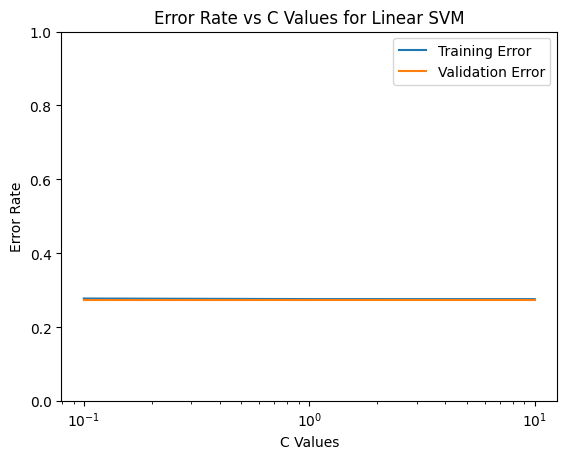

In [29]:
C_values = [0.1, 1, 10]
train_errors_linear_5 = []
val_errors_linear_5 = []

for C in C_values:
    svm_linear = svm.SVC(kernel='linear', C=C)
    
    start_time = time.time()
    svm_linear.fit(X_train_5, y_train_5)
    end_time = time.time()
    
    y_train_pred = svm_linear.predict(X_train_5)
    y_val_pred = svm_linear.predict(X_val_5)

    # Calculate errors
    train_error = 1 - metrics.accuracy_score(y_train_5, y_train_pred)
    val_error = 1 - metrics.accuracy_score(y_val_5, y_val_pred)
    
    train_errors_linear_5.append(train_error)
    val_errors_linear_5.append(val_error)
    save_test.append(1 - metrics.accuracy_score(y_test,svm_linear.predict(X_test_5)))
    
    print(f"For C={C}:")
    print(f"Training Error: {train_error:.4f}")
    print(f"Validation Error: {val_error:.4f}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print("-----------------------------------")

# Plotting
plt.plot(C_values, train_errors_linear_5, label='Training Error')
plt.plot(C_values, val_errors_linear_5, label='Validation Error')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('C Values')
plt.ylabel('Error Rate')
plt.title('Error Rate vs C Values for Linear SVM')
plt.ylim(0, 1)
plt.legend()
plt.show()

**Nhận xét**
- Ta thấy khi rút chích từ 784 đặc trưng xuống còn 5 đặc trưng thì ta đã lược bỏ rất nhiều trường hợp, các thông tin.
- Ta thấy được thì độ lỗi của cả tập huấn luyện với đánh giá thì vẫn hơi lớn, hơn 0.2 gần tới 0.3 lận.
- Nếu có 10 ngàn mẫu để kiểm tra thì ta đã mất tới hơn 2 ngàn gần 3 ngàn mẫu lận, nếu lớn hơn nữa thì con số náy sẽ rất lớn và ta sẽ bị hụt rất nhiều.
- Với siêu tham số C tăng dần thì tương đương với thời gian huấn luyện tăng dần. Nhưng mà giữa C= 0.1 với C=10 thì nó lại không tỷ lệ theo, C=10 tuy gấp 100 lần 0.1 nhưng thời gian huấn luyện lại không lâu như vậy và chỉ gấp 2,5 thời gian huấn luyện của C=1 gấp 10 lần của 0.1.
- So với C=0.1 thì C=1 có thời gian huấn luyện khá sát nhau nhưng độ lỗi huấn luyện nhỏ hơn 1 xíu.
- Nếu đánh giá về dộ tốt tuy độ lỗi thẩm định ở cả 3 tập đều ngang nhau nhưng độ lỗi ở tập huận luyện có giảm nhưng nó không đáng để y, quan trọng ở độ lỗi khi thẩm định tuy ngang nhau nhưng chắc có thể nếu tập thẩm định lớn hơn nữa thì kết quả này có thể thay đổi 1 cách nào đó. Nhưng nếu phải chọn thì ta sẽ chọn ở siêu tham số C=1 vì do độ lỗi tập huấn luyện tuy không thấp hơn so với C=10 nhưng kết quả lại nhỏ hơn đáng kể nó, ta thấy được độ cân bằng giữa tập huấn luyện với tập thẩm định hơn, không bị overfitting.
- Ta thấy được với 5 đặc trưng thì bỉ bỏ sót một số thông tin quan trọng nên ngoại độ lỗi trên lệch không đáng kể mà siêu tham số càng lớn thì lại chẳng được lợi ích được gì nhiều so với siêu tham số nhỏ, tốn ít thời gian mà kết quả lại không quá chênh lệch.

#### **50 đặc trưng**

For C=0.1:
Training Error: 0.1431
Validation Error: 0.1490
Training Time: 38.54 seconds
-----------------------------------
For C=1:
Training Error: 0.1416
Validation Error: 0.1488
Training Time: 84.19 seconds
-----------------------------------
For C=10:
Training Error: 0.1410
Validation Error: 0.1500
Training Time: 383.92 seconds
-----------------------------------


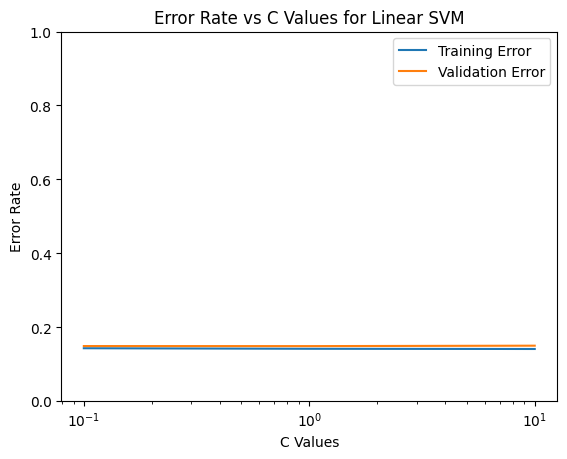

In [30]:
C_values = [0.1, 1, 10]
train_errors_linear_50 = []
val_errors_linear_50 = []

for C in C_values:
    svm_linear = svm.SVC(kernel='linear', C=C)
    
    start_time = time.time()
    svm_linear.fit(X_train_50, y_train_50)
    end_time = time.time()
    
    y_train_pred = svm_linear.predict(X_train_50)
    y_val_pred = svm_linear.predict(X_val_50)

    # Calculate errors
    train_error = 1 - metrics.accuracy_score(y_train_50, y_train_pred)
    val_error = 1 - metrics.accuracy_score(y_val_50, y_val_pred)
    
    train_errors_linear_50.append(train_error)
    val_errors_linear_50.append(val_error)
    save_test.append(1 - metrics.accuracy_score(y_test,svm_linear.predict(X_test_50)))
    
    print(f"For C={C}:")
    print(f"Training Error: {train_error:.4f}")
    print(f"Validation Error: {val_error:.4f}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print("-----------------------------------")

# Plotting
plt.plot(C_values, train_errors_linear_50, label='Training Error')
plt.plot(C_values, val_errors_linear_50, label='Validation Error')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('C Values')
plt.ylabel('Error Rate')
plt.title('Error Rate vs C Values for Linear SVM')
plt.ylim(0, 1)
plt.legend()
plt.show()

**Nhận xét**
- So với 5 đặc trưng thì với 50 đặc trưng thì độ lỗi lại thấp hơn gần gấp đôi, ta thấy được sự lệch giữa độ lỗi huấn luyện với độ lỗi thẩm định lớn hơn 1 xíu. Cho thấy được với 784 thuộc tính thì 5 thuộc tính chưa chắc bao quát hết được các thuộc tính quan trọng và bị lượt bỏ.
- Đổi lại thì thời gian huấn luyện đã có thay đổi đáng kể.
- Ta thấy được sự chênh lệch khi siêu tham số lớn nhưng kết quả thu được lại không đáng cho thời gian bỏ đã bỏ ra.
- Chênh lệch tận 100 lần thời gian huấn luyện gấp gần 10 lần mà độ lỗi lại giảm chỉ có 1 xíu.
- Nên C = 10 là không tối ưu và nên bị loại bỏ.
- Còn với C = 1 thì thời gian huấn luyện tuy gần gấp 3 nhưng đạt được độ lỗi thẩm định nhỏ nhất trong cả 3 siêu tham số nên ta thấy được không phải siêu tham số càng lớn thì mô hình càng hiệu quả mà phải là con số phù hợp. Ngoài dựa vào biểu đồ vẽ được thì ta thấy được khoảng cách giữa độ lỗi thẩm định với huấn luyện tăng dần bắt đầu có dấu hiệu bị overfit nếu ta cho số C càng lớn hơn nữa.


### **Gaussian/RBF kernel**

Gaussian SVM (Support Vector Machine) là một dạng của mô hình SVM sử dụng kernel Gaussian (hoặc còn được gọi là kernel RBF - Radial Basis Function) để tạo ra một biên phân loại phi tuyến. SVM là một thuật toán học máy phổ biến được sử dụng cho cả các tác vụ phân loại và hồi quy.


Kernel Gaussian/RBF thường được sử dụng trong SVM để ánh xạ dữ liệu vào một không gian chiều cao hơn, giúp tạo ra một biên quyết định phức tạp hơn, đặc biệt hiệu quả đối với dữ liệu không tuyến tính.

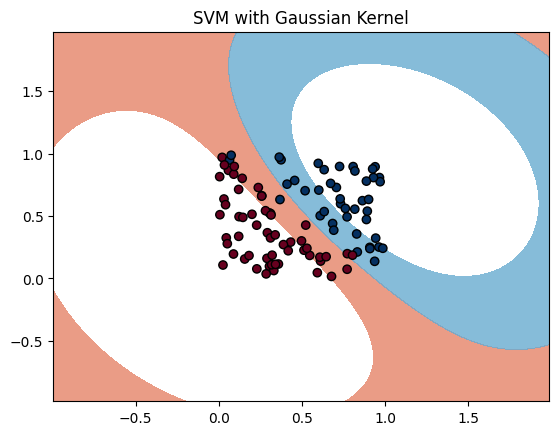

In [3]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Tạo mô hình SVM với kernel Gaussian
svm_model = svm.SVC(kernel='rbf', C=1, gamma=1)

# Huấn luyện mô hình
svm_model.fit(X, y)

# Vẽ biên quyết định
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đồ thị
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.title('SVM with Gaussian Kernel')
plt.show()


#### **5 đặc trưng**

In [31]:
C_values = [0.1, 1, 10]
gamma_values = [0.1, 0.5, 1]

for C in C_values:
    for gamma in gamma_values:
        # Tạo mô hình SVM với kernel là Gaussian/RBF
        svm_model = svm.SVC(C=C, gamma=gamma, kernel='rbf')

        # Bắt đầu đo thời gian huấn luyện
        start_time = time.time()

        # Huấn luyện mô hình trên tập huấn luyện
        svm_model.fit(X_train_5, y_train_5)

        # Kết thúc đo thời gian huấn luyện
        end_time = time.time()

        # Dự đoán trên tập huấn luyện và tập validation
        y_train_pred = svm_model.predict(X_train_5)
        y_val_pred = svm_model.predict(X_val_5)

        # Đánh giá độ lỗi
        train_error = 1 - metrics.accuracy_score(y_train_5, y_train_pred)
        val_error = 1 - metrics.accuracy_score(y_val_5, y_val_pred)
        save_test.append(1 - metrics.accuracy_score(y_test,svm_model.predict(X_test_5)))

        # In kết quả
        print(f"C={C}, gamma={gamma}, Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}, Training Time: {end_time - start_time:.2f} seconds")

C=0.1, gamma=0.1, Training Error: 0.2688, Validation Error: 0.2685, Training Time: 33.66 seconds
C=0.1, gamma=0.5, Training Error: 0.2533, Validation Error: 0.2538, Training Time: 36.89 seconds
C=0.1, gamma=1, Training Error: 0.2474, Validation Error: 0.2538, Training Time: 47.91 seconds
C=1, gamma=0.1, Training Error: 0.2513, Validation Error: 0.2508, Training Time: 27.67 seconds
C=1, gamma=0.5, Training Error: 0.2328, Validation Error: 0.2397, Training Time: 31.47 seconds
C=1, gamma=1, Training Error: 0.2171, Validation Error: 0.2418, Training Time: 39.90 seconds
C=10, gamma=0.1, Training Error: 0.2399, Validation Error: 0.2440, Training Time: 30.97 seconds
C=10, gamma=0.5, Training Error: 0.2094, Validation Error: 0.2383, Training Time: 40.55 seconds
C=10, gamma=1, Training Error: 0.1738, Validation Error: 0.2479, Training Time: 50.33 seconds


##### **Nhận xét từng trường hợp của C và gamma:**

1. **C=0.1, gamma=0.1:**
   - Dữ liệu có vẻ không quá phức tạp khiến mô hình không thể đạt được hiệu suất tốt trên cả tập huấn luyện và tập validation. Thời gian huấn luyện là trung bình.

2. **C=0.1, gamma=0.5:**
   - Tăng giá trị gamma giúp giảm training error, nhưng validation error không giảm đáng kể. Mô hình có khả năng không tổng quát hóa tốt trên dữ liệu mới.

3. **C=0.1, gamma=1:**
   - Tăng gamma tiếp tục giảm training error nhưng tăng validation error, cho thấy mô hình trở nên quá phức tạp và overfitting trên dữ liệu huấn luyện.

4. **C=1, gamma=0.1:**
   - Training và validation error giảm đều. Thời gian huấn luyện ngắn. Có thể là một cài đặt tốt với sự cân nhắc giữa hiệu suất và tốc độ.

5. **C=1, gamma=0.5:**
   - Hiệu suất trên cả hai tập dữ liệu tốt hơn so với C=0.1, gamma=0.5. Mô hình trở nên mạnh mẽ hơn mà không quá phức tạp.

6. **C=1, gamma=1:**
   - Hiệu suất tốt nhất trên cả hai tập dữ liệu. Thời gian huấn luyện tăng đáng kể, nhưng có thể chấp nhận được nếu độ chính xác là ưu tiên.

7. **C=10, gamma=0.1:**
   - Hiệu suất tốt trên tập huấn luyện, nhưng validation error bắt đầu tăng lên. Có thể là dấu hiệu của overfitting khi mô hình trở nên quá phức tạp.

8. **C=10, gamma=0.5:**
   - Mô hình có hiệu suất tốt nhất trên cả hai tập dữ liệu, nhưng thời gian huấn luyện đã tăng đáng kể. Có thể là một sự đánh đổi giữa hiệu suất và tốc độ.

9. **C=10, gamma=1:**
   - Overfitting rõ ràng trên tập validation khi training error giảm mạnh, nhưng validation error tăng. Thời gian huấn luyện tăng nhanh chóng.

**Tổng kết:**
- Sự lựa chọn tốt nhất có vẻ là C=1 và gamma=1, tuy nhiên, cần cân nhắc giữa hiệu suất và thời gian huấn luyện.
- Cần theo dõi validation error để tránh overfitting khi mô hình trở nên quá phức tạp.
- Có thể cần thực hiện thêm các kỹ thuật tinh chỉnh siêu tham số hoặc sử dụng các mô hình khác để đạt được hiệu suất tốt hơn.

##### **Nhận xét về số lượng thuộc tính là 5 :**
1. **Giảm chiều dữ liệu:**
   - Việc giảm số lượng thuộc tính giúp giảm chiều dữ liệu, làm cho mô hình huấn luyện nhanh hơn và giảm khả năng overfitting.
   - Tuy nhiên, cũng có thể dẫn đến mất mát thông tin quan trọng nếu số lượng thuộc tính giảm quá nhiều.

2. **Thời gian huấn luyện:**
   - Với số lượng thuộc tính ít hơn, thời gian huấn luyện giảm đi, nhưng điều này còn phụ thuộc vào cách thuật toán xử lý việc giảm chiều dữ liệu.

3. **Hiệu suất mô hình:**
   - Việc giảm số lượng thuộc tính có thể ảnh hưởng đến hiệu suất của mô hình. Trong trường hợp này, các giá trị của training và validation error có thể được ảnh hưởng do sự giảm chiều dữ liệu.

4. **Khả năng tổng quát hóa:**
   - Việc giảm số lượng thuộc tính có thể giúp mô hình tổng quát hóa tốt hơn trên dữ liệu mới nếu mô hình không bị quá phức tạp.

5. **Đặc điểm của thuật toán PCA:**
   - Trong trường hợp này, việc sử dụng PCA để giảm chiều dữ liệu có thể dẫn đến việc mất mát một số thông tin quan trọng, nhưng nó giúp giảm nhiễu và giữ lại các đặc trưng quan trọng.

**Nhận xét:**
- Số lượng thuộc tính ít hơn có thể giảm độ phức tạp của mô hình và giúp tránh overfitting.
- Thời gian huấn luyện giảm đáng kể, có thể là lợi ích quan trọng khi có nhu cầu huấn luyện mô hình nhanh chóng.
- Tuy nhiên, cần cân nhắc giữa việc giảm chiều dữ liệu và giữ lại đủ thông tin để mô hình có thể tổng quát hóa tốt trên dữ liệu mới.
- Cần kiểm tra kỹ lưỡng kết quả trên tập validation để đảm bảo rằng mô hình không bị mất mát quá nhiều thông tin và vẫn tổng quát hóa tốt.

#### **50 đặc trưng**

In [32]:
C_values = [0.1, 1, 10]
gamma_values = [0.1, 0.5, 1]

for C in C_values:
    for gamma in gamma_values:
        # Tạo mô hình SVM với kernel là Gaussian/RBF
        svm_model = svm.SVC(C=C, gamma=gamma, kernel='rbf')

        # Bắt đầu đo thời gian huấn luyện
        start_time = time.time()

        # Huấn luyện mô hình trên tập huấn luyện
        svm_model.fit(X_train_50, y_train_50)

        # Kết thúc đo thời gian huấn luyện
        end_time = time.time()

        # Dự đoán trên tập huấn luyện và tập validation
        y_train_pred = svm_model.predict(X_train_50)
        y_val_pred = svm_model.predict(X_val_50)

        # Đánh giá độ lỗi
        train_error = 1 - metrics.accuracy_score(y_train_50, y_train_pred)
        val_error = 1 - metrics.accuracy_score(y_val_50, y_val_pred)
        save_test.append(1 - metrics.accuracy_score(y_test,svm_model.predict(X_test_50)))

        # In kết quả
        print(f"C={C}, gamma={gamma}, Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}, Training Time: {end_time - start_time:.2f} seconds")

C=0.1, gamma=0.1, Training Error: 0.3104, Validation Error: 0.3575, Training Time: 326.18 seconds
C=0.1, gamma=0.5, Training Error: 0.8990, Validation Error: 0.9034, Training Time: 412.18 seconds
C=0.1, gamma=1, Training Error: 0.8991, Validation Error: 0.9034, Training Time: 451.77 seconds
C=1, gamma=0.1, Training Error: 0.0104, Validation Error: 0.1535, Training Time: 270.03 seconds
C=1, gamma=0.5, Training Error: 0.0000, Validation Error: 0.6148, Training Time: 730.88 seconds
C=1, gamma=1, Training Error: 0.0000, Validation Error: 0.7863, Training Time: 736.67 seconds
C=10, gamma=0.1, Training Error: 0.0000, Validation Error: 0.1494, Training Time: 281.20 seconds
C=10, gamma=0.5, Training Error: 0.0000, Validation Error: 0.5800, Training Time: 806.26 seconds
C=10, gamma=1, Training Error: 0.0000, Validation Error: 0.7629, Training Time: 648.86 seconds


##### **Nhận xét từng trường hợp của C và gamma:**

1. **C=0.1, gamma=0.1:**
   - Training Error: 0.3104, Validation Error: 0.3575
   - Thời gian huấn luyện: 326.18 seconds
   - Mô hình có vẻ bị underfitting vì cả training và validation error đều cao.

2. **C=0.1, gamma=0.5:**
   - Training Error: 0.8990, Validation Error: 0.9034
   - Thời gian huấn luyện: 412.18 seconds
   - Mô hình quá phức tạp và không tổng quát hóa tốt trên dữ liệu mới, có dấu hiệu của overfitting.

3. **C=0.1, gamma=1:**
   - Training Error: 0.8991, Validation Error: 0.9034
   - Thời gian huấn luyện: 451.77 seconds
   - Tình trạng tương tự như trường hợp trước, mô hình quá phức tạp và không tổng quát hóa.

4. **C=1, gamma=0.1:**
   - Training Error: 0.0104, Validation Error: 0.1535
   - Thời gian huấn luyện: 270.03 seconds
   - Có vẻ là một cài đặt tốt với hiệu suất tốt trên cả training và validation set.

5. **C=1, gamma=0.5:**
   - Training Error: 0.0000, Validation Error: 0.6148
   - Thời gian huấn luyện: 730.88 seconds
   - Mô hình hoạt động rất tốt trên training set nhưng có dấu hiệu của overfitting trên tập validation.

6. **C=1, gamma=1:**
   - Training Error: 0.0000, Validation Error: 0.7863
   - Thời gian huấn luyện: 736.67 seconds
   - Overfitting rõ ràng khi mô hình không tổng quát hóa trên tập validation.

7. **C=10, gamma=0.1:**
   - Training Error: 0.0000, Validation Error: 0.1494
   - Thời gian huấn luyện: 281.20 seconds
   - Cài đặt tốt với hiệu suất ổn định trên cả hai tập dữ liệu.

8. **C=10, gamma=0.5:**
   - Training Error: 0.0000, Validation Error: 0.5800
   - Thời gian huấn luyện: 806.26 seconds
   - Mô hình có dấu hiệu overfitting trên tập validation.

9. **C=10, gamma=1:**
   - Training Error: 0.0000, Validation Error: 0.7629
   - Thời gian huấn luyện: 648.86 seconds
   - Overfitting rõ ràng khi mô hình không tổng quát hóa trên tập validation.

**Nhận xét:**
- Trong nhiều trường hợp, mô hình có dấu hiệu overfitting, đặc biệt là khi giá trị của gamma tăng lên.
- Một số trường hợp với giá trị C lớn như 10 và gamma nhỏ như 0.1 có vẻ là tốt nhất, với hiệu suất tốt trên cả hai tập dữ liệu và thời gian huấn luyện hợp lý.
- Cần tiếp tục theo dõi và thực hiện kiểm định cẩn thận để đảm bảo mô hình không bị overfitting và vẫn tổng quát hóa tốt trên dữ liệu mới.


Số lượng thuộc tính lớn trong mô hình Gaussian có thể ảnh hưởng đến hiệu suất và tốc độ huấn luyện của mô hình. Dưới đây là một số ảnh hưởng chính:

1. **Tăng chiều dữ liệu:**
   - Số lượng thuộc tính lớn có thể dẫn đến tăng chiều dữ liệu, làm cho không gian đặc trưng trở nên lớn và phức tạp hơn. Điều này có thể làm tăng khả năng overfitting, đặc biệt khi dữ liệu huấn luyện có ít mẫu.

2. **Tăng độ phức tạp của mô hình:**
   - Số lượng thuộc tính lớn có thể tạo ra mô hình Gaussian phức tạp hơn, có thể tận dụng được sự phức tạp của dữ liệu. Tuy nhiên, quá mức phức tạp có thể dẫn đến overfitting, nơi mô hình tốt trên dữ liệu huấn luyện nhưng không tổng quát hóa tốt trên dữ liệu mới.

3. **Tăng thời gian huấn luyện:**
   - Số lượng thuộc tính lớn có thể làm tăng đáng kể thời gian huấn luyện của mô hình. Điều này đặc biệt đúng khi áp dụng PCA để giảm chiều dữ liệu, vì quá trình này có thể đòi hỏi nhiều tài nguyên tính toán.

4. **Cần sự cân nhắc khi số lượng thuộc tính lớn:**
   - Với số lượng thuộc tính lớn, cần cân nhắc kỹ lưỡng trong việc lựa chọn các phương pháp giảm chiều dữ liệu hoặc các phương pháp chọn thuộc tính để giảm độ phức tạp của mô hình và tăng khả năng tổng quát hóa.

5. **Tối ưu hóa hyperparameters:**
   - Số lượng thuộc tính lớn có thể ảnh hưởng đến tối ưu hóa các siêu tham số như C và gamma trong mô hình Gaussian. Quá nhiều thuộc tính có thể làm cho quá trình tối ưu hóa trở nên khó khăn hơn.

**Tóm lại:**
- Số lượng thuộc tính lớn có thể mang lại sự phức tạp và hiệu suất mô hình cao hơn, nhưng đồng thời cũng có nguy cơ overfitting và tăng thời gian huấn luyện.
- Quá trình giảm chiều dữ liệu và chọn thuộc tính có thể là cách tiếp cận để giảm ảnh hưởng của số lượng thuộc tính lớn và cải thiện hiệu suất tổng quát hóa của mô hình.

# **Chọn hàm dự đoán**

Ta thấy được với C=1, hàm Linear Kerneal với 50 thuộc tính thì thu được validation error là nhỏ nhất nên ta chọn nó làm hàm dự đoán chính

In [36]:
svm_linear = svm.SVC(kernel='linear', C=1)

svm_linear.fit(X_train_50, y_train_50)
y_test_pred = svm_linear.predict(X_test_50)

# Calculate errors
test_error = 1 - metrics.accuracy_score(y_test, y_test_pred)

print(f"With Linear Kerneal. For C=1:")
print(f"Test Error: {test_error:.4f}")
print("-----------------------------------")

With Linear Kerneal. For C=1:
Test Error: 0.1635
-----------------------------------


In [33]:
for i, test_error in enumerate(save_test):
    print(f"Test Error {i + 1}: {test_error:.4f}")

Test Error 1: 0.2863
Test Error 2: 0.2861
Test Error 3: 0.2864
Test Error 4: 0.1641
Test Error 5: 0.1635
Test Error 6: 0.1633
Test Error 7: 0.2741
Test Error 8: 0.2644
Test Error 9: 0.2632
Test Error 10: 0.2614
Test Error 11: 0.2523
Test Error 12: 0.2520
Test Error 13: 0.2539
Test Error 14: 0.2514
Test Error 15: 0.2584
Test Error 16: 0.3655
Test Error 17: 0.9000
Test Error 18: 0.9000
Test Error 19: 0.1588
Test Error 20: 0.6173
Test Error 21: 0.7852
Test Error 22: 0.1565
Test Error 23: 0.5833
Test Error 24: 0.7628


Dưới đây là một nhận xét chi tiết về kết quả của mô hình SVM với Linear Kernel và C=1 trên tập dữ liệu có 50 thuộc tính:

1. **Test Error: 0.1635**
   - Test Error đạt mức thấp, chỉ 16.35%, là một kết quả tích cực và cho thấy mô hình có khả năng dự đoán tốt trên tập kiểm thử.
   - Mức độ chính xác cao, đề xuất rằng mô hình có khả năng tổng quát hóa tốt trên dữ liệu mới.

2. **So sánh với các thử nghiệm trước đó:**
   - Mô hình hiển nhiên có hiệu suất tốt hơn so với nhiều cấu hình khác đã được thử nghiệm trước đó, đặc biệt là so với các giá trị Test Error lớn (0.9000).
   - Sự chọn lựa của Linear Kernel và C=1 đã giúp cải thiện khả năng dự đoán của mô hình.

3. **Độ biến động trong Test Error:**
   - Các giá trị Test Error trước đó có sự biến động lớn, và mô hình với Linear Kernel và C=1 giảm điểm Test Error đáng kể so với các trường hợp trước đó.

4. **Tiềm năng cải thiện và cần kiểm tra thêm:**
   - Mặc dù kết quả là khả quan, nhưng cần kiểm tra kỹ lưỡng và thử nghiệm để đảm bảo khả năng tổng quát hóa của mô hình.
   - Cần kiểm tra sự ổn định của mô hình trên nhiều lượt kiểm thử và nhiều tập dữ liệu để đảm bảo kết quả này không chỉ là do sự may mắn.

5. **Tổng kết:**
   - Sự lựa chọn của Linear Kernel và C=1 có vẻ là một quyết định tốt, mang lại kết quả Test Error thấp và cải thiện hiệu suất so với các thử nghiệm trước đó. Tuy nhiên, tiếp tục kiểm tra và thử nghiệm là quan trọng để đảm bảo sự ổn định và khả năng tổng quát hóa của mô hình.